# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


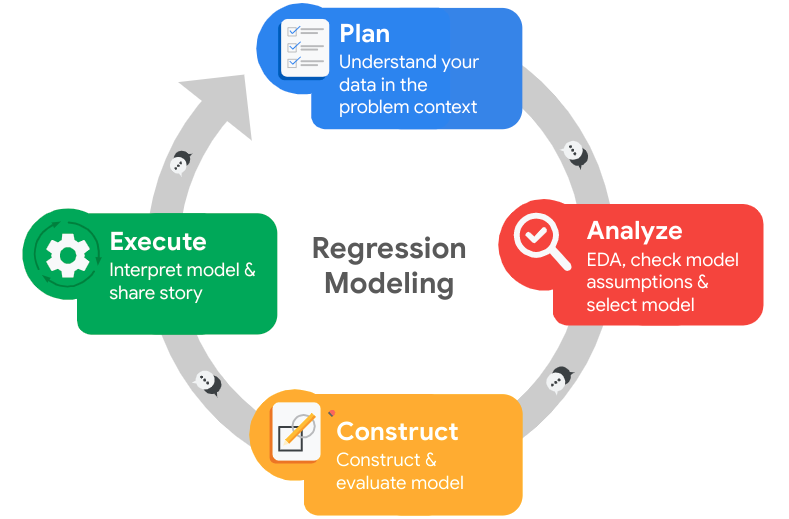

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,  classification_report, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

### YOUR CODE HERE ###
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
print(df0.shape)
print(df0.size)

(14999, 10)
149990


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
print(df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
print(df0.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [7]:
# Rename columns as needed
### YOUR CODE HERE ###
columns = ['satisfaction_level', 'last_evaluation', 'num_projects', 'avg_monthly_hours', 
 'years_with_company', 'work_accident', 'left', 'promotion_last_5_years', 
 'department', 'salary']

df0 = df0.rename(columns = {
    'number_project': 'num_projects',
    'average_monthly_hours': 'avg_monthly_hours',
    'time_spend_company':'tenure',
    'Work_accident': 'work_accident',
    'promotion_last_5years' : 'promotion_last_5_years',
    'Department': 'department'
})

# Display all column names after the update
### YOUR CODE HERE ###


In [8]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level        0
last_evaluation           0
num_projects              0
average_montly_hours      0
tenure                    0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
dispaly_dup = df0[df0.duplicated()]
dispaly_dup.head()

,satisfaction_level,last_evaluation,num_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

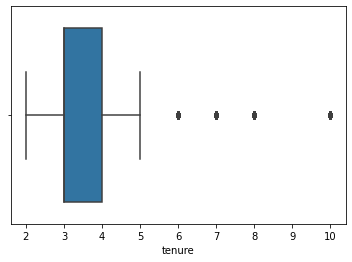

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(df0['tenure'])
plt.show()

In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

from scipy import stats

# Define a function to find outliers using the Z-score method
def n_outliers(df, column, threshold=3):
    z_scores = stats.zscore(df[column])
    outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
    return outliers

# Apply to each numerical column
for column in df0.select_dtypes(include='number').columns:
    outliers = n_outliers(df0, column)
    if not outliers.empty:
        print(f"Outliers in '{column}' (Z-score method):")
        print(outliers)


Outliers in 'tenure' (Z-score method):
       satisfaction_level  last_evaluation  num_projects  \
11007                0.49             0.67             2   
11008                0.92             0.99             3   
11009                0.81             0.55             4   
11010                0.62             0.91             3   
11011                0.21             0.70             3   
...                   ...              ...           ...   
11994                0.22             0.94             3   
11995                0.90             0.55             3   
11996                0.74             0.95             5   
11997                0.85             0.54             3   
11998                0.33             0.65             3   

       average_montly_hours  tenure  work_accident  left  \
11007                   190       8              0     0   
11008                   176       8              0     0   
11009                   217       8              0     0   


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

df0['left'].value_counts()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
who_stayed_n_left = ((df0['left'] == 0).value_counts() * 100)/11991 # ANother method

print(who_stayed_n_left)
who_stay = df0['left'].value_counts(normalize = True) # One method
who_stay

True     83.39588
False    16.60412
Name: left, dtype: float64


0    0.833959
1    0.166041
Name: left, dtype: float64

In [16]:
print(df0.columns)

Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')


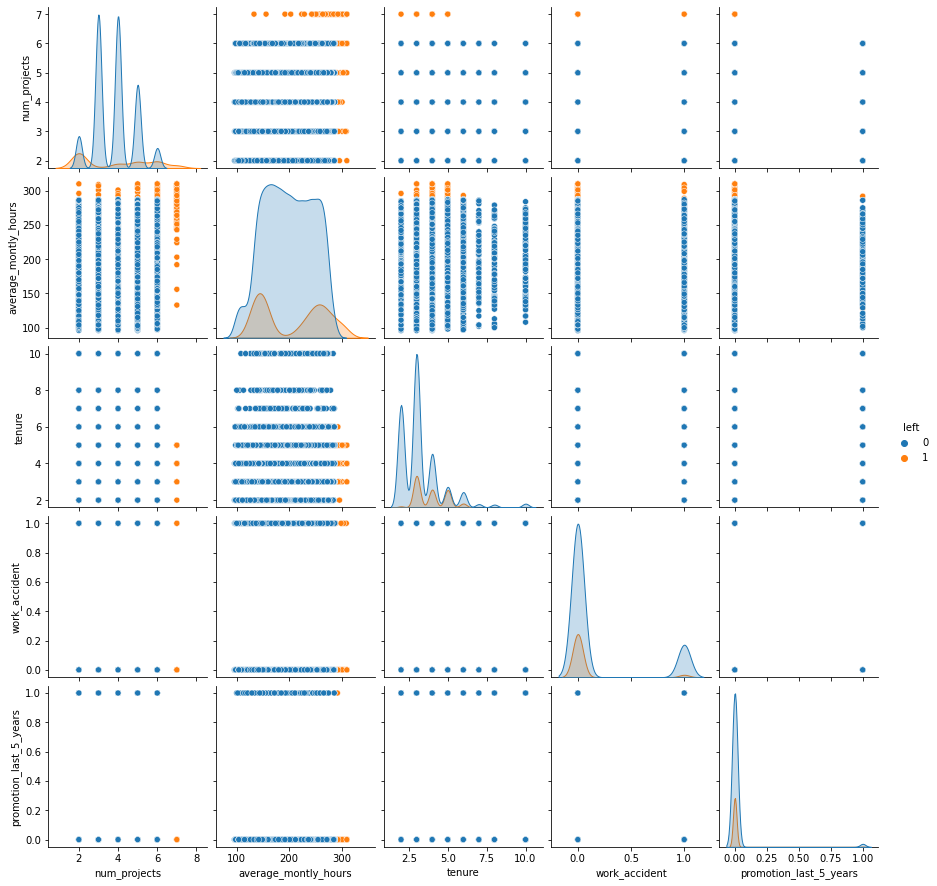

In [17]:
sns.pairplot(df0[['num_projects',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary']], hue = 'left')

##### From this we can say that people who are involved in projects 7 or MORE left, and also who worked more than 275-300 hours left

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

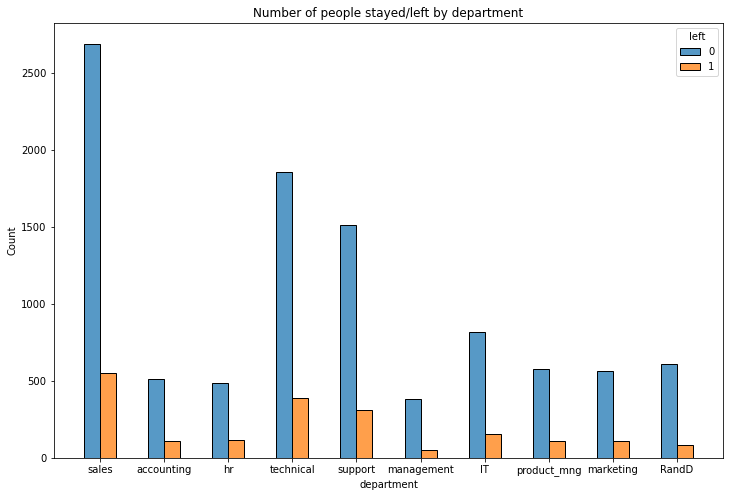

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (12, 8))
sns.histplot(data = df0, x = 'department', hue = 'left', shrink = .5, multiple = 'dodge')
plt.title('Number of people stayed/left by department')
plt.show()


#### Visualizing the number of employees left based on working hours and number of projects involved

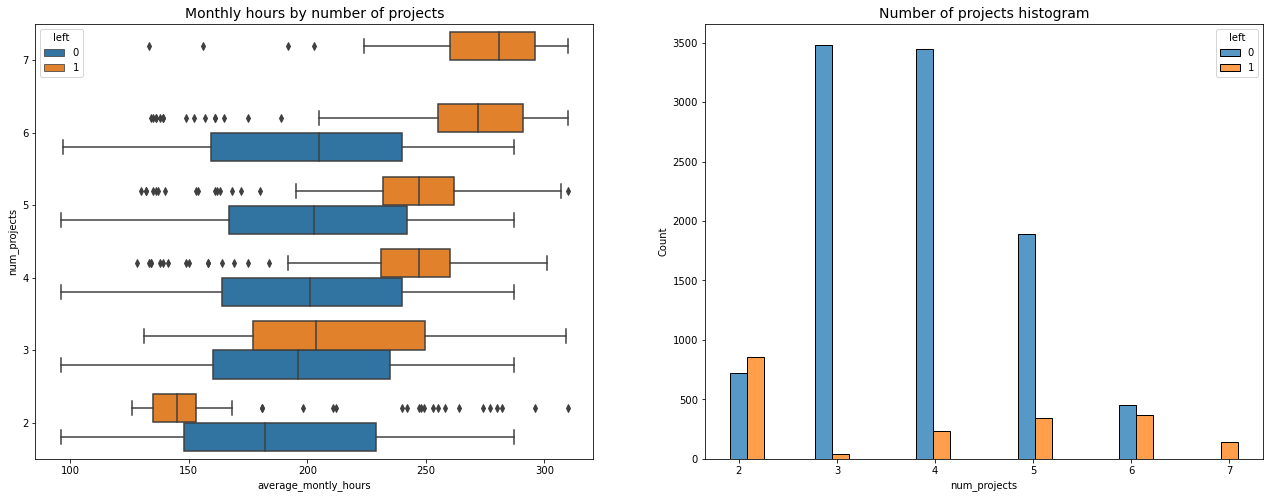

In [21]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))


# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left


sns.boxplot(data=df0, x='average_montly_hours', y='num_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left

sns.histplot(data=df0, x='num_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

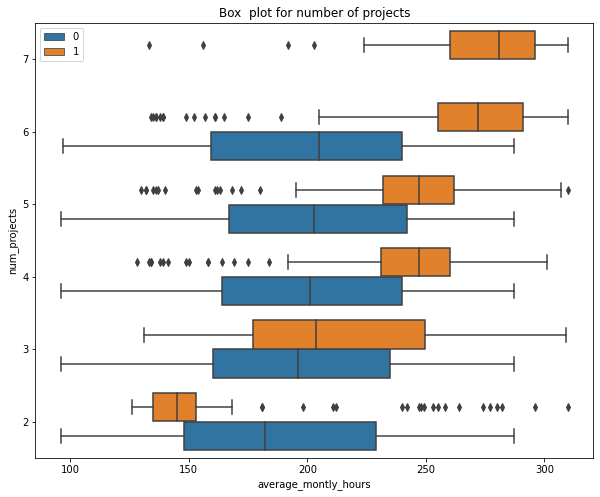

In [30]:
plt.figure(figsize = (10, 8))
ax = sns.boxplot(data=df0,  y='num_projects',x='average_montly_hours', hue='left', orient="h")

plt.title('Box  plot for number of projects')

ax.invert_yaxis()
plt.legend()

plt.show()


###### Most people with greater than 2 projects have worked more than 40 hours a week and people involved in 6 projects aand who worked on an average of 250 - 300 hours have completetly left as we can see in the bo plot and Histogram

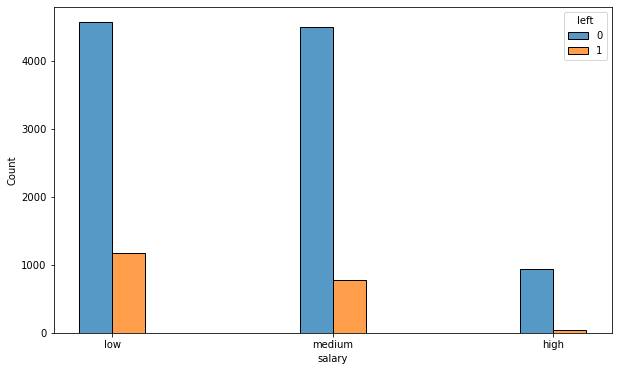

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###


plt.figure(figsize = (10, 6))
sns.histplot(data = df0, x = 'salary', hue = 'left', multiple = 'dodge', shrink = 0.3)
plt.show()


##### Many people with lower salary have left the company when you compare with people who have a high salary

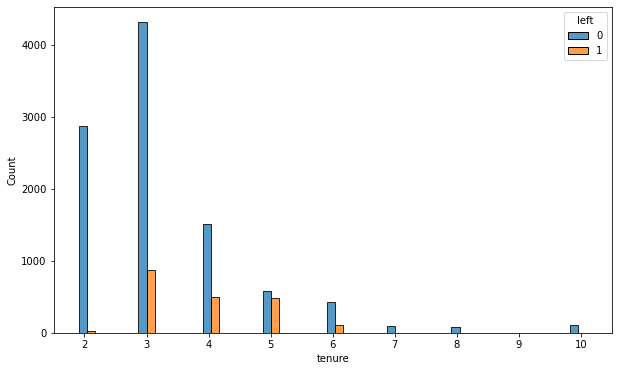

In [23]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df0, x = 'tenure', hue = 'left', multiple = 'dodge', shrink = 3)
plt.show()

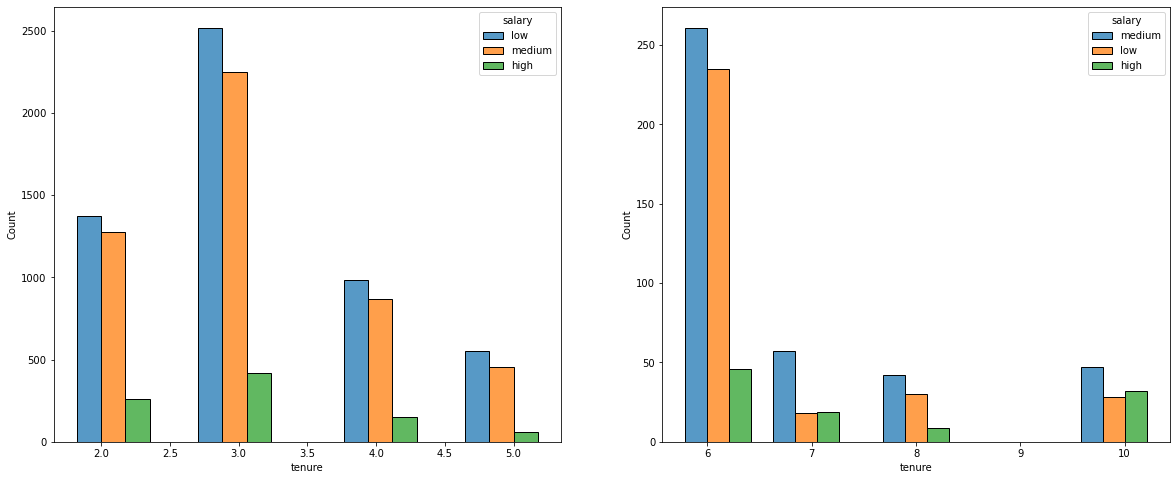

In [33]:
##### Now we will see salary based on 'tenure' in the company and how many left


fig, ax = plt.subplots(1, 2, figsize = (20, 8))

long_tenure = df0[df0['tenure'] > 5]
short_tenure = df0[df0['tenure'] < 6]

sns.histplot(data = short_tenure, x = 'tenure', hue = 'salary',multiple =  'dodge', shrink = 3, ax = ax[0])

sns.histplot(data = long_tenure, x = 'tenure', hue = 'salary', multiple =  'dodge', shrink = 3, ax = ax[1])

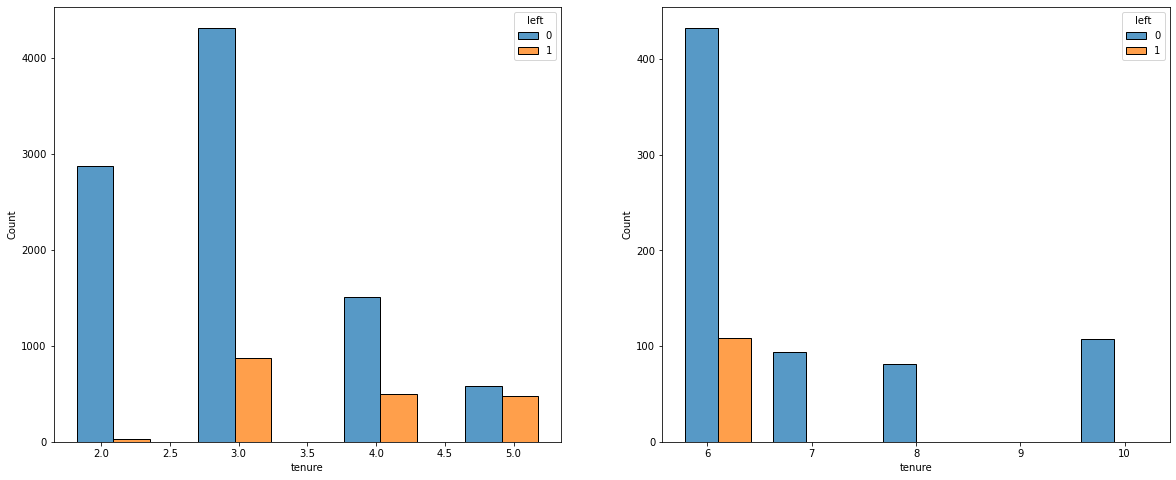

In [32]:
##### Now we will see salary based on 'tenure' in the company and how many left


fig, ax = plt.subplots(1, 2, figsize = (20, 8))

long_tenure = df0[df0['tenure'] > 5]
short_tenure = df0[df0['tenure'] < 6]

sns.histplot(data = short_tenure, x = 'tenure', hue = 'left',multiple =  'dodge', shrink = 3, ax = ax[0])

sns.histplot(data = long_tenure, x = 'tenure', hue = 'left', multiple =  'dodge', shrink = 3, ax = ax[1])

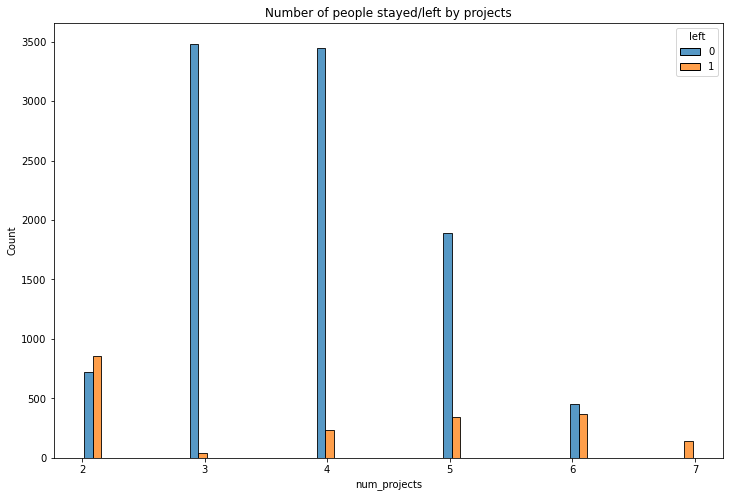

In [25]:
plt.figure(figsize = (12, 8))
sns.histplot(data = df0, x = 'num_projects', hue = 'left', shrink = .8, multiple = 'dodge')
plt.title('Number of people stayed/left by projects')
plt.show()

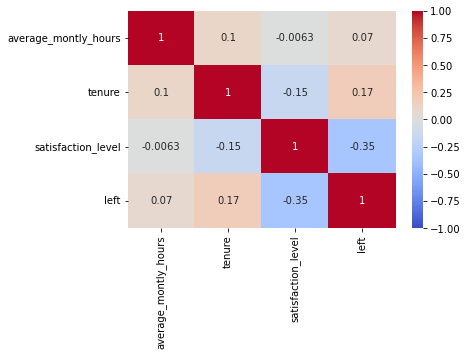

In [26]:
sns.heatmap(df0[['average_montly_hours', 'tenure', 'satisfaction_level', 'left']].corr(), vmin = -1, vmax = 1, center = 0, annot = True, cmap = 'coolwarm')
plt.show()

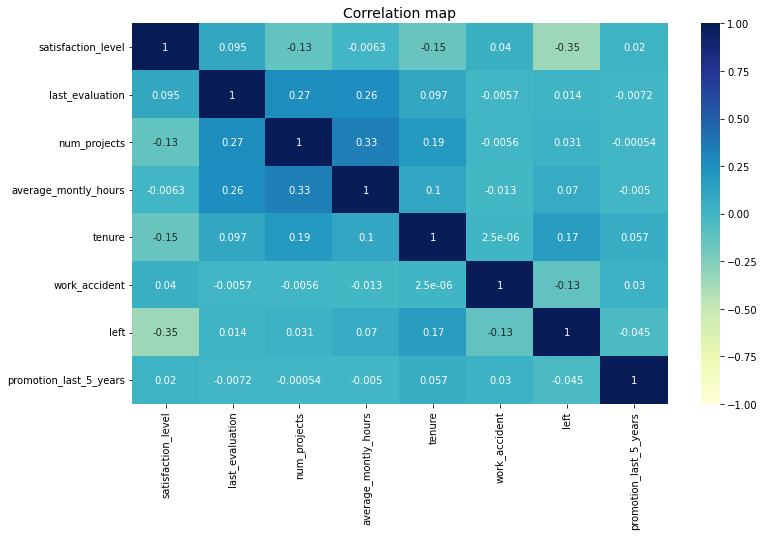

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (12, 7))
sns.heatmap(df0.corr(), vmin = -1, vmax = 1, annot = True,center = 0, cmap="YlGnBu")
plt.title('Correlation map', fontdict={'fontsize':14})
plt.show()


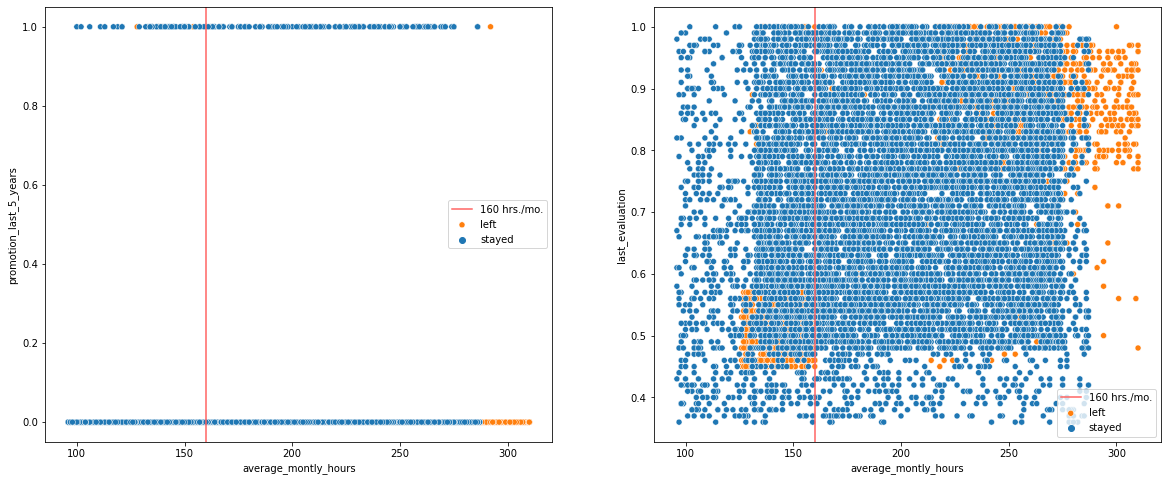

<Figure size 1152x216 with 0 Axes>

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
### Now we will see how they are promoted based on their average_monthly hours and other one tenure vs promotion 
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df0, x='average_montly_hours', y='promotion_last_5_years', hue='left', ax = ax[0])
ax[0].axvline(x=160, color='#ff6361')
ax[0].legend(labels=['160 hrs./mo.', 'left', 'stayed'])


sns.scatterplot(data = df0, x = 'average_montly_hours', y = 'last_evaluation', hue = 'left', ax = ax[1])
ax[1].axvline(x=160, color='#ff6361')
ax[1].legend(labels=['160 hrs./mo.', 'left', 'stayed'])
plt.show()


In [29]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.scatterplot(data = df0, x =  , y = )
plt.show()


SyntaxError: invalid syntax (<ipython-input-29-17bc4c69f212>, line 3)

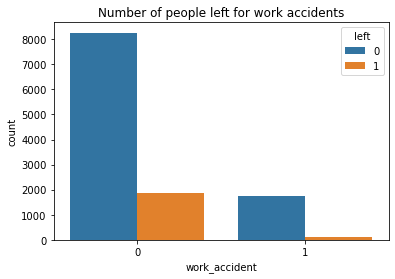

In [34]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.countplot(data = df0, x = 'work_accident', hue = 'left')
plt.title('Number of people left for work accidents')
plt.show()


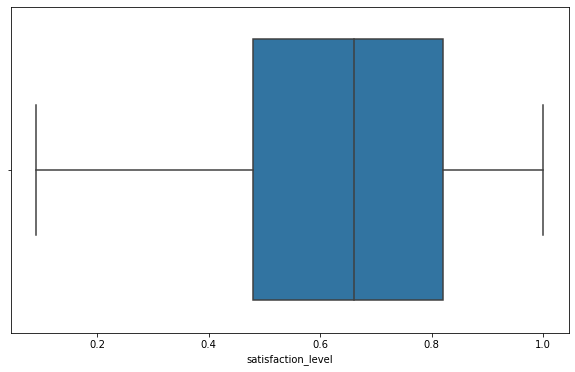

In [35]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (10, 6))
sns.boxplot(data = df0, x ='satisfaction_level' , hue = 'left')
plt.show()


In [ ]:
strings = 'RADAR'

rev_string = ""

for i in strings:
    rev_string = i + rev_string
if strings == rev_string:
    print('Palindrome')
else:
    print('NOT...')

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


##### hERE The outcome is left which is categorical either 1 left or 0 stayed. we can choose either of Logistic Regression Or Decision Tree models

In [51]:
df_copy = df0.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   num_projects            11991 non-null  int64  
 3   average_montly_hours    11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5_years  11991 non-null  int64  
 8   department              11991 non-null  object 
 9   salary                  11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [52]:
#### We should convert all the variables to numeric data type for our model to work well

df_copy['salary'] = df_copy['salary'].map({'low': 0, 'medium': 1, 'high': 2})



In [53]:
df_dummy = pd.get_dummies(df_copy, drop_first = True)
df_dummy.head()
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   num_projects            11991 non-null  int64  
 3   average_montly_hours    11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5_years  11991 non-null  int64  
 8   salary                  11991 non-null  int64  
 9   department_RandD        11991 non-null  uint8  
 10  department_accounting   11991 non-null  uint8  
 11  department_hr           11991 non-null  uint8  
 12  department_management   11991 non-null  uint8  
 13  department_marketing    11991 non-null  uint8  
 14  department_product_mng  11991 non-null

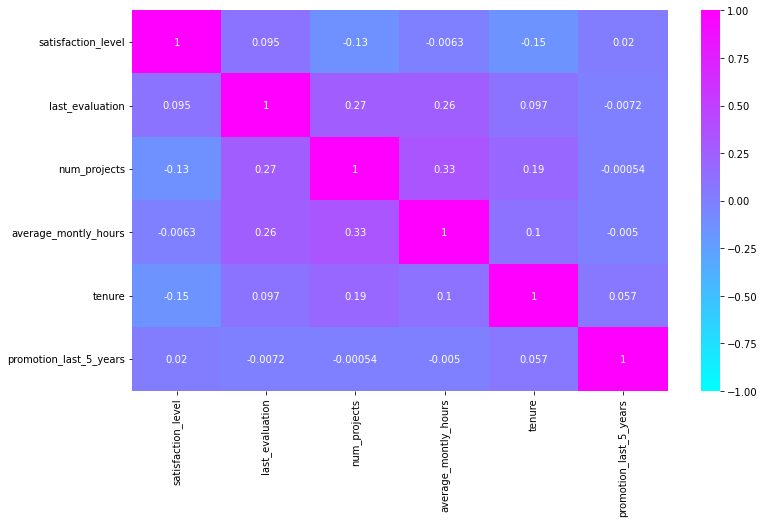

In [54]:
plt.figure(figsize = (12, 7))

sns.heatmap(data = df_dummy[['satisfaction_level', 'last_evaluation', 'num_projects', 'average_montly_hours', 'tenure', 'promotion_last_5_years']].corr(), vmin = -1, vmax = 1, center= 0, annot = True, cmap = 'cool')

In [55]:
y = df_dummy['left']

X = df_dummy.drop('left', axis = 1)  # dropping columns left as it is a dependent varaiable
X.head()

,satisfaction_level,last_evaluation,num_projects,average_montly_hours,tenure,work_accident,promotion_last_5_years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42, )



In [57]:
clf = LogisticRegression(random_state = 42,  max_iter = 300).fit(X_train, y_train)  ### You should INclude max_iter, radom_state in this
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
clf_pred = clf.predict(X_test)
clf_pred

array([0, 0, 0, ..., 0, 0, 0])

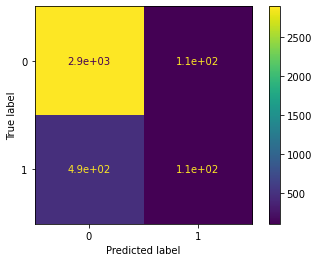

In [60]:

cm = confusion_matrix(y_test, clf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,  display_labels = clf.classes_)

disp.plot()

plt.show()

In [61]:
display_names = ['Predicted Would not leave', 'Predicted would leave']

report = classification_report(y_test, clf_pred, target_names = display_names)
print(report)

                           precision    recall  f1-score   support

Predicted Would not leave       0.86      0.96      0.91      3001
    Predicted would leave       0.49      0.18      0.27       597

                 accuracy                           0.83      3598
                macro avg       0.67      0.57      0.59      3598
             weighted avg       0.80      0.83      0.80      3598



In [62]:
####  Based on our above report we can understand that out Logistic Regression Model performs poor 

### WE WILL TRY TO USE DECISION TREE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





In [63]:
#### Constructing Decision Tree Model

tree = DecisionTreeClassifier(random_state = 0)

In [64]:
cv_params = {'max_depth': [4, 5, 6, None],
            'min_samples_split': [2, 4, 6],
            'min_samples_leaf': [2, 4, 1]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [65]:

grid = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit =  'roc_auc')

In [66]:
%%time
grid.fit(X_train, y_train)

CPU times: user 2.84 s, sys: 0 ns, total: 2.84 s
Wall time: 2.84 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, None],
                         'min_samples_leaf': [2, 4, 1],
                

In [68]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [69]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [70]:
grid.best_score_

0.970727583356033

In [58]:
### Finding other evaluation metrics scores define a function for that

def _results_(model_name:str, model_object, metric:str):
    ## The model_name and metric should be given as strings
    metrics = {
        'roc_auc':'mean_test_roc_auc',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy',
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall'
    }
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    best_estimator_results = cv_results.iloc[cv_results[metrics[metric]].idxmax(), :]
    
    ## Extracting
    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
    
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [roc_auc]})
    return table


In [59]:
results_disp = _results_('Decision Tree', grid, 'roc_auc')
results_disp

,model,precision,recall,F1,accuracy,auc
0,Decision Tree,0.946055,0.970728,0.930906,0.977427,0.970728


In [60]:
### Over model might be overfitting to avoid this we use 
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [61]:
%%time
rf_fit = rf1.fit(X_train, y_train)

CPU times: user 9min 8s, sys: 838 ms, total: 9min 9s
Wall time: 9min 9s


In [77]:
path_to = 'C:\\Users\\thall\\OneDrive\\Documents\\Python_Games\\More Python'
import pickle

In [78]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [83]:
def read_pickle(path, save_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + save_model_name + '.pickle', 'rb') as to_read:
        x = pickle.load(to_read)
    return x


In [84]:
write_pickle(path_to, rf1,'hr_rf1' )

In [85]:
new_rf1 = read_pickle(path_to, 'hr_rf1')

In [86]:
new_rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [87]:
new_rf1.best_score_

0.9803963087745455

In [94]:
rf1_cv_results = _results_('random forest cv', new_rf1, 'roc_auc')
print(results_disp)
print(rf1_cv_results)

           model  precision    recall        F1  accuracy       auc
0  Decision Tree   0.946055  0.970728  0.930906  0.977427  0.970728
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.948704  0.980396  0.931836  0.977761  0.980396


💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
### YOUR CODE HERE ###


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.